<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-03 18:12:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: 'survey-data.csv'

     0K .......... .......... .......... .......... ..........  0% 1.19M 2m8s
    50K .......... .......... .......... .......... ..........  0% 3.02M 89s
   100K .......... .......... .......... .......... ..........  0% 4.18M 71s
   150K .......... .......... .......... .......... ..........  0% 5.33M 61s
   200K .......... .......... .......... .......... ..........  0% 10.3M 51s
   250K .......... .......... .......... .......... ..

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



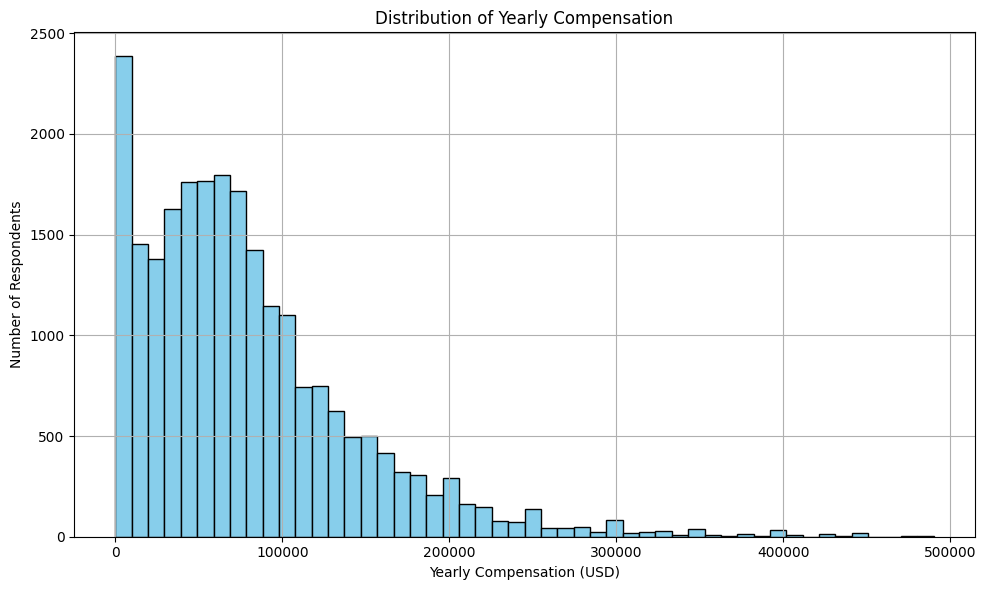

In [4]:
# Clean the data
comp_data = df['ConvertedCompYearly'].dropna()
comp_data = comp_data[comp_data < 500000]  # Remove extreme outliers

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [5]:
# unique [Age]

# Display unique values in the 'Age' column
unique_ages = df['Age'].unique()
print("Unique ages in the dataset:", unique_ages)

Unique ages in the dataset: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


<Figure size 1000x600 with 0 Axes>

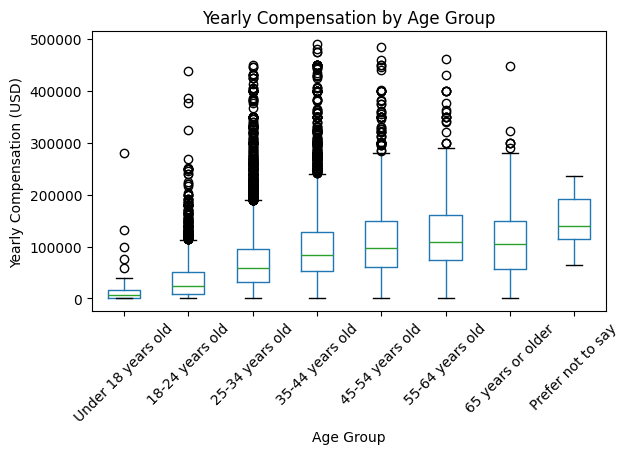

In [6]:
# Step 1: Define ordered categories for age
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Step 2: Create a mapping to numeric values
age_mapping = {age: i for i, age in enumerate(age_order)}

# Step 3: Map the Age column to numeric
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 4: Box plot of ConvertedCompYearly by Age group
plt.figure(figsize=(10, 6))
df_clean = df[['ConvertedCompYearly', 'Age', 'AgeNumeric']].dropna()
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 500000]  # Optional: remove outliers

# Sort boxplot by age order
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)
df_clean.sort_values('Age', inplace=True)

df_clean.boxplot(column='ConvertedCompYearly', by='Age', grid=False)
plt.title('Yearly Compensation by Age Group')
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



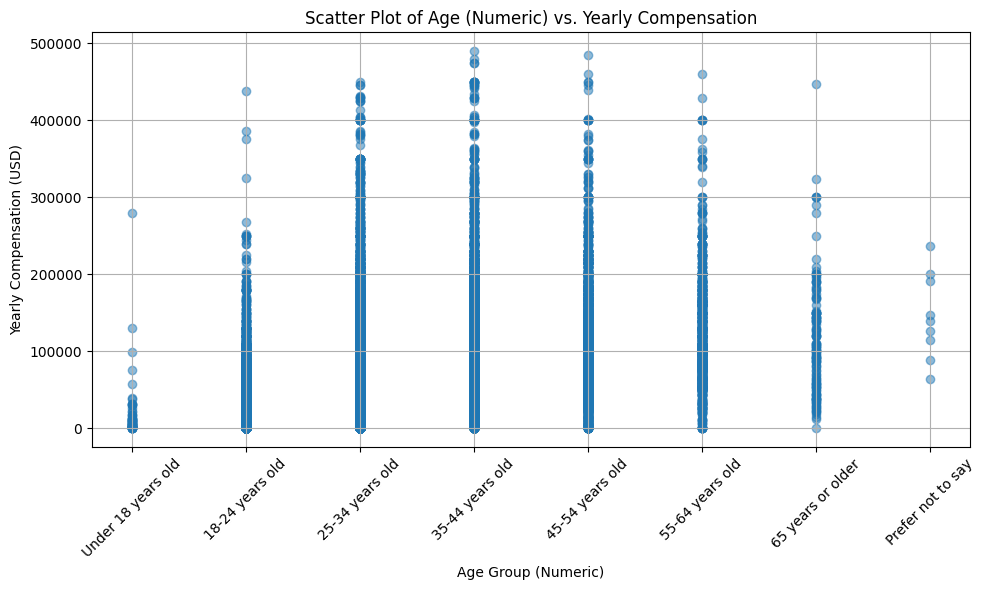

In [7]:
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

age_mapping = {age: i for i, age in enumerate(age_order)}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Filter out rows with missing or extreme compensation values
df_scatter = df[['Age_numeric', 'ConvertedCompYearly']].dropna()
df_scatter = df_scatter[df_scatter['ConvertedCompYearly'] < 500000]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age_numeric'], df_scatter['ConvertedCompYearly'], alpha=0.5)
plt.title('Scatter Plot of Age (Numeric) vs. Yearly Compensation')
plt.xlabel('Age Group (Numeric)')
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


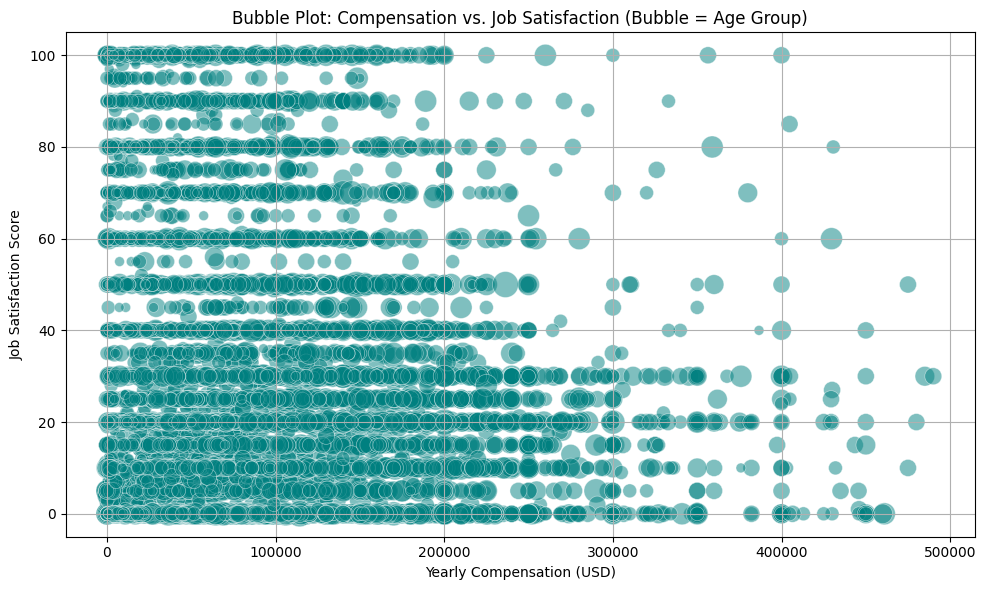

In [8]:
# Drop missing or extreme values
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']].dropna()
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < 500000]  # Optional: cap outliers

# Scale bubble sizes for better visibility
bubble_size = df_bubble['Age_numeric'] * 50  # You can tweak the multiplier

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=bubble_size,
    alpha=0.5,
    color='teal',
    edgecolors='w',
    linewidth=0.5
)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble = Age Group)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



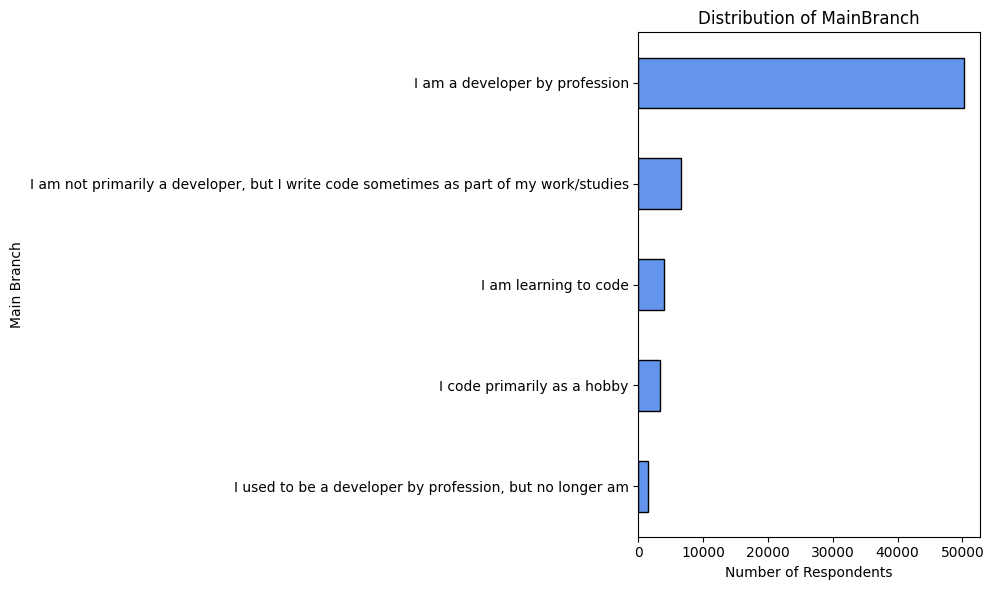

In [9]:
# Step 1: Count the values
mainbranch_counts = df['MainBranch'].value_counts()

# Step 2: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='cornflowerblue', edgecolor='black')

plt.title('Distribution of MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



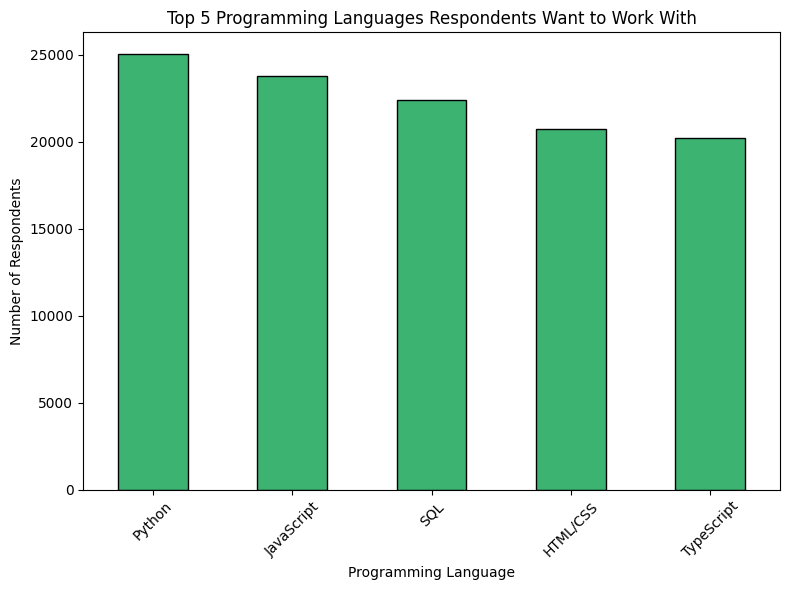

In [10]:
# Step 1: Split and flatten the language responses
langs_series = df['LanguageWantToWorkWith'].dropna().str.split(';')
flat_langs = [lang.strip() for sublist in langs_series for lang in sublist]

# Step 2: Count language frequencies
lang_counts = pd.Series(flat_langs).value_counts()

# Step 3: Select top 5
top5_langs = lang_counts.head(5)

# Step 4: Plot vertical bar chart
plt.figure(figsize=(8, 6))
top5_langs.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


C:\Users\beall\AppData\Local\Temp\ipykernel_340\2160921096.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()


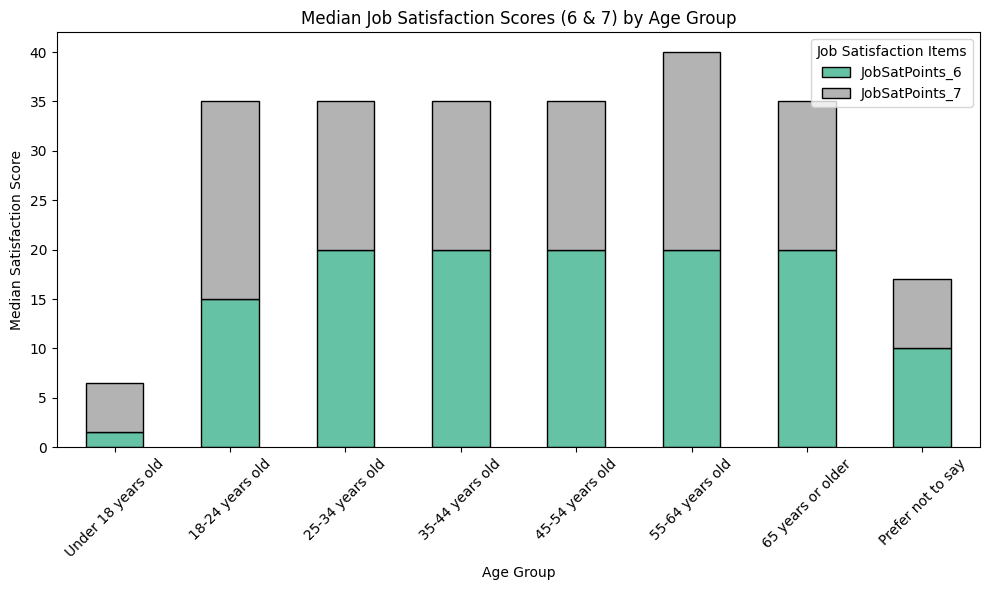

In [11]:
# Step 1: Define and enforce age group order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Step 2: Group by Age and calculate median for each JobSat column
median_satisfaction = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Step 3: Plot stacked bar chart
median_satisfaction.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2',
    edgecolor='black'
)

plt.title('Median Job Satisfaction Scores (6 & 7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Items')
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



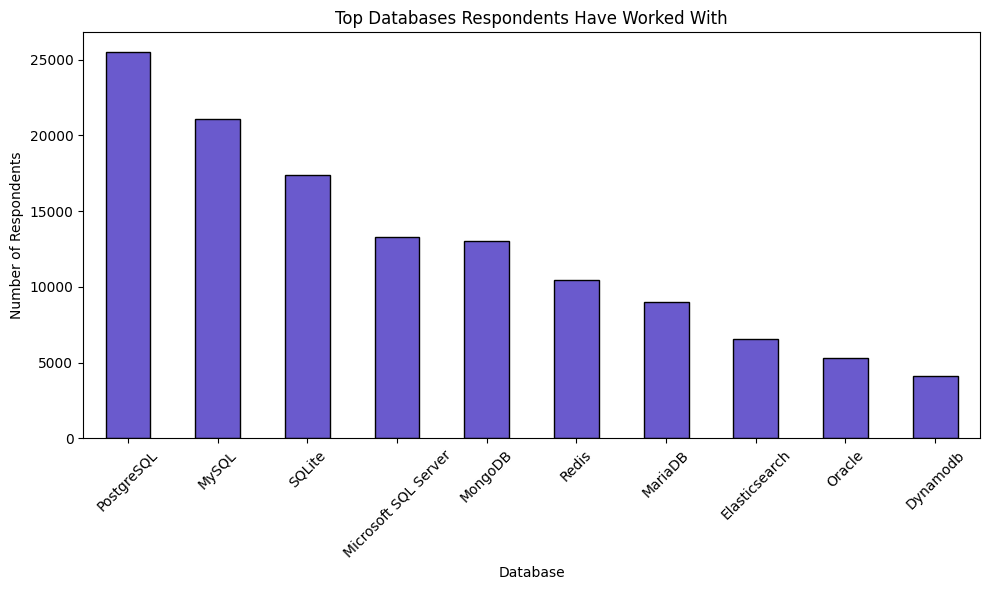

In [12]:
# Step 1: Split and flatten the responses
db_series = df['DatabaseHaveWorkedWith'].dropna().str.split(';')
flat_db_list = [db.strip() for sublist in db_series for db in sublist]

# Step 2: Count database mentions
db_counts = pd.Series(flat_db_list).value_counts()

# Step 3: Plot the top databases
top_dbs = db_counts.head(10)  # You can adjust this number

plt.figure(figsize=(10, 6))
top_dbs.plot(kind='bar', color='slateblue', edgecolor='black')

plt.title('Top Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



C:\Users\beall\AppData\Local\Temp\ipykernel_340\2051793629.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp = df_filtered.groupby('Age')['ConvertedCompYearly'].median()


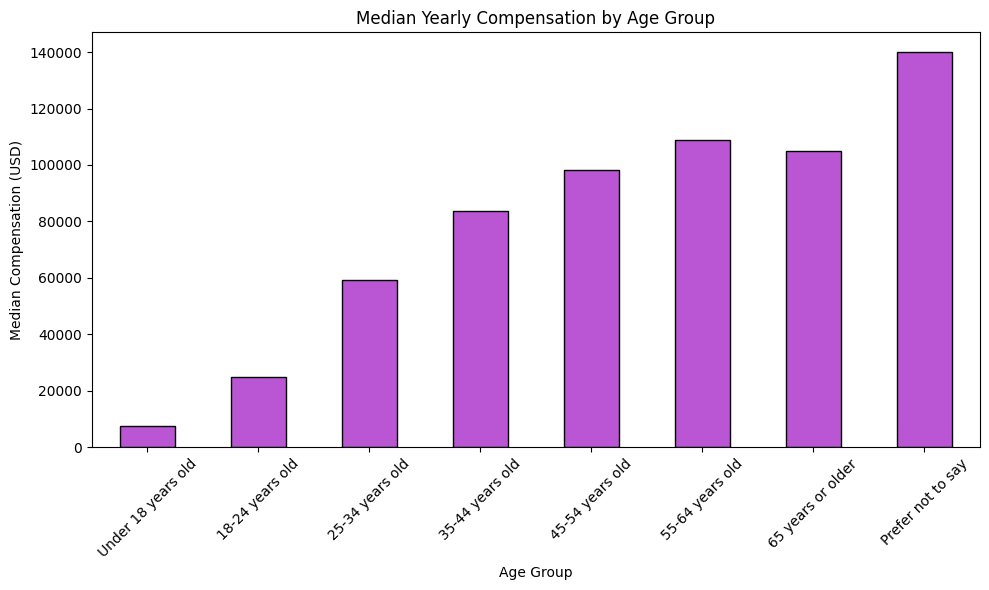

In [13]:
# Step 1: Define ordered age categories
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Step 2: Clean the data
df_filtered = df[['Age', 'ConvertedCompYearly']].dropna()
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 500000]  # Optional: remove outliers

# Step 3: Compute median compensation by age group
median_comp = df_filtered.groupby('Age')['ConvertedCompYearly'].median()

# Step 4: Plot grouped bar chart
plt.figure(figsize=(10, 6))
median_comp.plot(kind='bar', color='mediumorchid', edgecolor='black')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



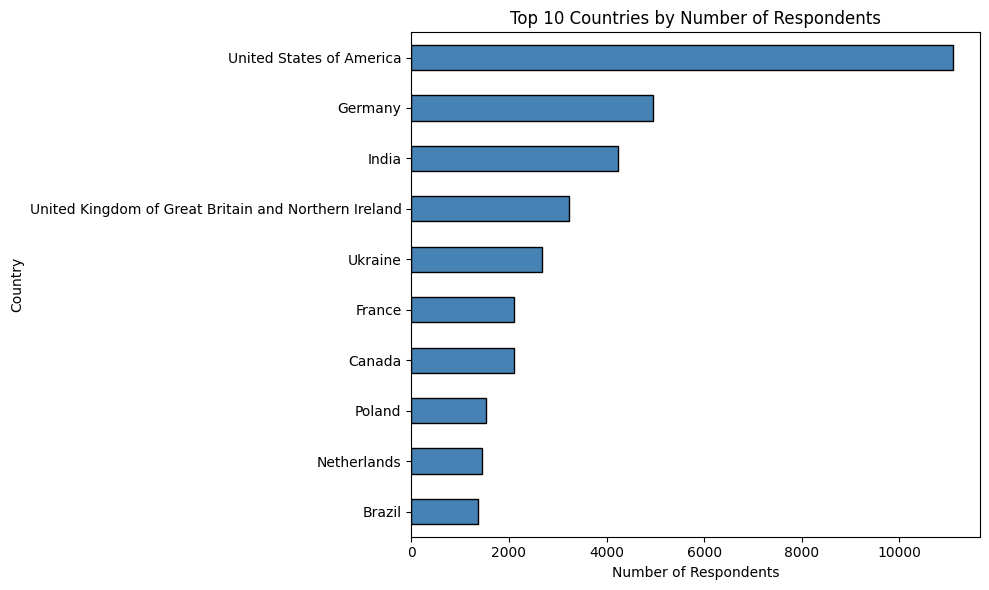

In [14]:
# Step 1: Count number of respondents per country
country_counts = df['Country'].value_counts()

# Step 2: Select top 10 most represented countries
top_countries = country_counts.head(10)

# Step 3: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color='steelblue', edgecolor='black')

plt.title('Top 10 Countries by Number of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Show highest at the top
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
